# CLV (Customer Lifetime Value) Analysis

## Basic Information

- Annual churn rate is 20%.
- Present annual revenue is \$1,000, the growth rate is 10% per year.
- Cost is 30% of the revenue.
- Annual discount rate is 10%.

## Assumptions

- The payment is due at the beginning of each month.
- Customers can require to leave at any time of the month, but their requirements will NOT be approved until the next month.
- The fee remains the same for the whole year and will only increase at the start of the next year.
- The customer lifetime is assumed to be 5 years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
churn_ann = 0.2
churn_mon = 1 - (1 - churn_ann)**(1/12)

init_rev_ann = 1000
init_rev_mon = init_rev_ann/12

grow_r = 0.1
cost_r = 0.3
disc_ann = 0.1
disc_mon = (1 + disc_ann)**(1/12) - 1
nr_years = 5

## Calculate the CLV monthly

In [3]:
def clv_calc(churn_rate, init_rev, rev_grow, cost_rate, disc_rate, nr_years, extra_cost=0):
    # time
    time = np.arange(1, nr_years*12+1)
    
    # profit
    growth = np.repeat(np.power(1+rev_grow, np.arange(0, nr_years)), 12)
    revenue = init_rev * growth
    cost = cost_rate * revenue
    profit = revenue - cost - extra_cost
    
    # expected profit 
    active_within = np.power(1-churn_rate, time-1)
    exp_profit = active_within * profit
    
    # present value of expected profit
    discount = np.power(1+disc_rate, time-1)
    PV_exp_profit = exp_profit/discount
    
    # CLV
    CLV = np.cumsum(PV_exp_profit)
    CLV_final = sum(PV_exp_profit)
    
    # dataframe
    result = pd.DataFrame({
    'month': time, 
    'revenue': revenue,
    'cost': cost,
    'extra_cost': extra_cost,
    'profit': profit,
    'retention': active_within,
    'exp_profit': exp_profit,
    'PV_exp_profit': PV_exp_profit,
    'CLV': CLV})
    
    print(f'''The CLV in 5 years period is ${round(CLV_final, 3)}.''')
    
    return result, CLV_final

In [4]:
result, CLV_5yrs = clv_calc(churn_rate = churn_mon, 
                            init_rev = init_rev_mon, 
                            rev_grow = grow_r, 
                            cost_rate = cost_r, 
                            disc_rate = disc_mon, 
                            nr_years = nr_years, 
                            extra_cost=0)

The CLV in 5 years period is $2042.096.


In [5]:
result.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,51.000000,52.000000,53.000000,54.000000,55.000000,56.000000,57.000000,58.000000,59.000000,60.000000
revenue,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,...,122.008333,122.008333,122.008333,122.008333,122.008333,122.008333,122.008333,122.008333,122.008333,122.008333
cost,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,36.602500,36.602500,36.602500,36.602500,36.602500,36.602500,36.602500,36.602500,36.602500,36.602500
extra_cost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
profit,58.333333,58.333333,58.333333,58.333333,58.333333,58.333333,58.333333,58.333333,58.333333,58.333333,...,85.405833,85.405833,85.405833,85.405833,85.405833,85.405833,85.405833,85.405833,85.405833,85.405833
retention,1.000000,0.981577,0.963492,0.945742,0.928318,0.911215,0.894427,0.877949,0.861774,0.845897,...,0.394647,0.387376,0.380239,0.373234,0.366357,0.359608,0.352983,0.346479,0.340096,0.333830
exp_profit,58.333333,57.258631,56.203728,55.168261,54.151870,53.154204,52.174919,51.213676,50.270143,49.343992,...,33.705115,33.084150,32.474625,31.876330,31.289057,30.712604,30.146771,29.591363,29.046188,28.511056
PV_exp_profit,58.333333,56.805655,55.317984,53.869274,52.458503,51.084679,49.746834,48.444025,47.175335,45.939871,...,22.658246,22.064854,21.487003,20.924285,20.376303,19.842673,19.323017,18.816971,18.324178,17.844290
CLV,58.333333,115.138988,170.456972,224.326246,276.784749,327.869428,377.616262,426.060287,473.235622,519.175493,...,1863.092506,1885.157361,1906.644363,1927.568648,1947.944951,1967.787624,1987.110641,2005.927612,2024.251790,2042.096080


## Evaluate the strategy

If a customer choose to pay the monthly bill by auto-pay, his/her annual churn rate will decrease to 0.15. Everything else keeps the same.

### Re-calculate the CLV

In [6]:
result_auto, CLV_5yrs_auto = clv_calc(churn_rate = 1 - (1 - 0.15)**(1/12), 
                            init_rev = init_rev_mon, 
                            rev_grow = grow_r, 
                            cost_rate = cost_r, 
                            disc_rate = disc_mon, 
                            nr_years = nr_years, 
                            extra_cost=0)

The CLV in 5 years period is $2313.046.


### Estimate the maximum extra cost per month

The extra cost is the cost of appealing customer to choose auto-pay. It can be VIP service cost, mailing cost, discount on monthly payment, etc. The following code calculated the maximum extra cost to implement this auto-pay policy.

In [7]:
diff = CLV_5yrs_auto - CLV_5yrs
print(f'''The incremental profit by the new strategy is ${round(diff, 3)}.
Therefore, maximum amount to spend on autopay incentives is ${diff.round(3)} per existing customer.''')

The incremental profit by the new strategy is $270.95.
Therefore, maximum amount to spend on autopay incentives is $270.95 per existing customer.


In [8]:
def func(x, discount_mon=disc_mon, max_pay=diff, nr_years=5):
    time = np.arange(0, nr_years*12)
    return sum(x/np.power(1+discount_mon, time)) - max_pay

max_pay_mon = root(func, 0)['x'][0]
print(f'''Maximum amount to spend on autopay incentives is ${round(max_pay_mon, 3)} per existing customer every month.''')

Maximum amount to spend on autopay incentives is $5.655 per existing customer every month.


## Visualization

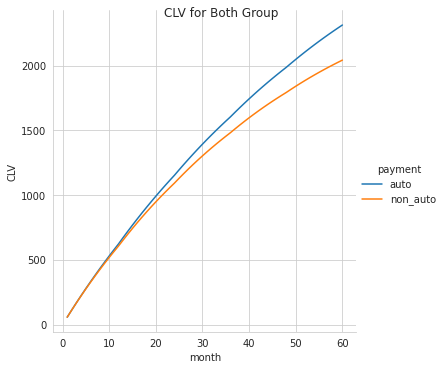

In [9]:
result_auto_plot = result_auto[['month', 'retention', 'CLV']]
result_non_auto_plot = result[['month','retention', 'CLV']]
performance = pd.concat([result_auto_plot, result_non_auto_plot], axis=0)

performance['payment'] = np.repeat(['auto', 'non_auto'], nr_years*12)

sns.set_style("whitegrid")
c = sns.relplot(x="month", 
                y="CLV", 
                hue="payment", 
                data=performance, 
                kind="line")
c.fig.suptitle("CLV for Both Group")
plt.show()

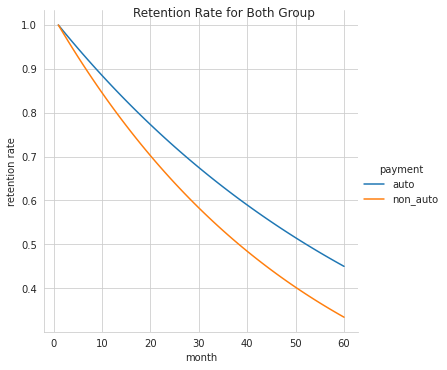

In [10]:
rc = sns.relplot(x="month", 
                 y="retention", 
                 hue="payment", 
                 data=performance, 
                 kind="line")
rc.set(ylabel = "retention rate")
rc.fig.suptitle("Retention Rate for Both Group")
plt.show()